<a href="https://colab.research.google.com/github/rahul-createui/machine_learning/blob/main/rmse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("StudentsPerformance.csv")
print("Dataset loaded successfully!\n")
print(df.head())
print("\nColumns in dataset:\n", df.columns)

target_column = "math score"

if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found! Choose from: {df.columns}")

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("-------------------")
print("RMSE:", rmse)
print("R² Score:", r2)


Dataset loaded successfully!

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Columns in dataset:
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'

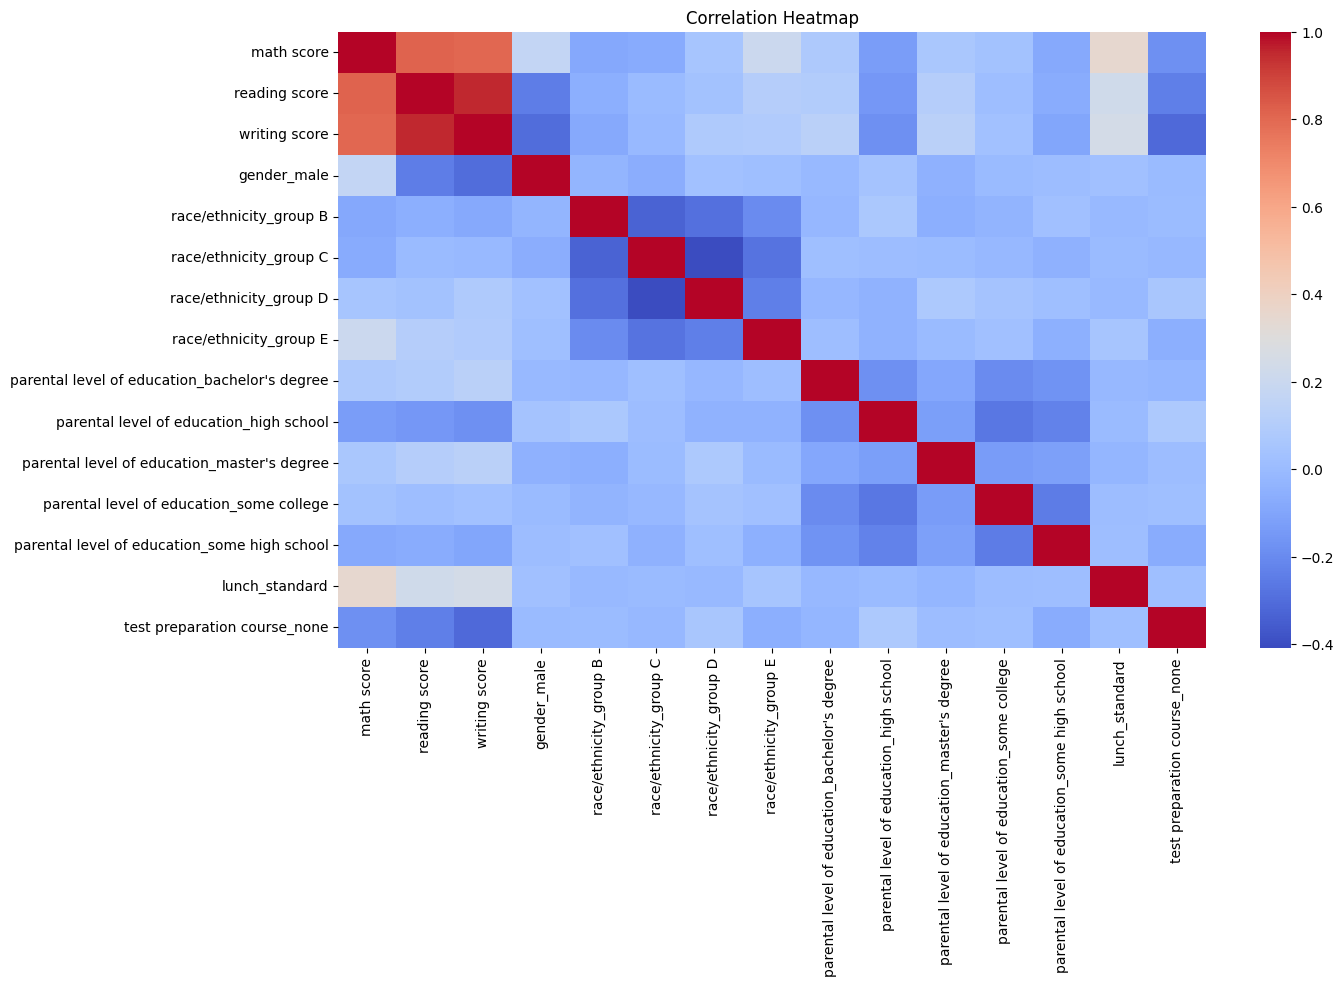

In [9]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

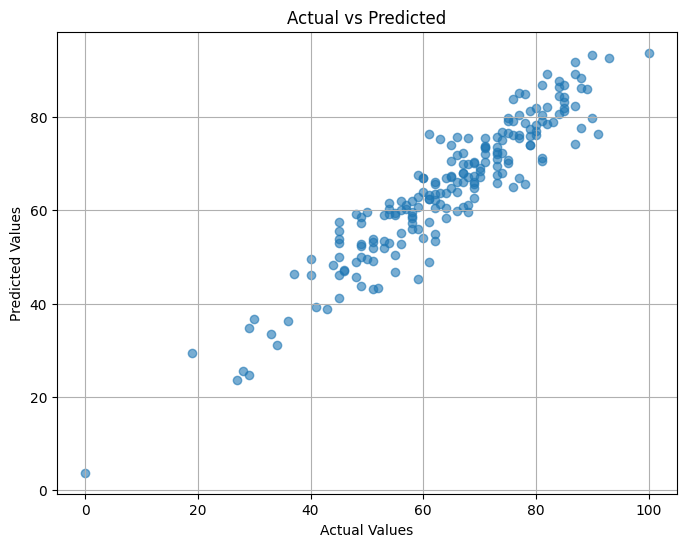

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()
